In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
data_path = '../data/'
file_rice = 'rice.png'

In [66]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img);
        
def sharpen_img(image, blur):
    return image + (image - blur)

# Q.2 Edge Detection

## Q.2.1 Sobel edge detector

### Part 1

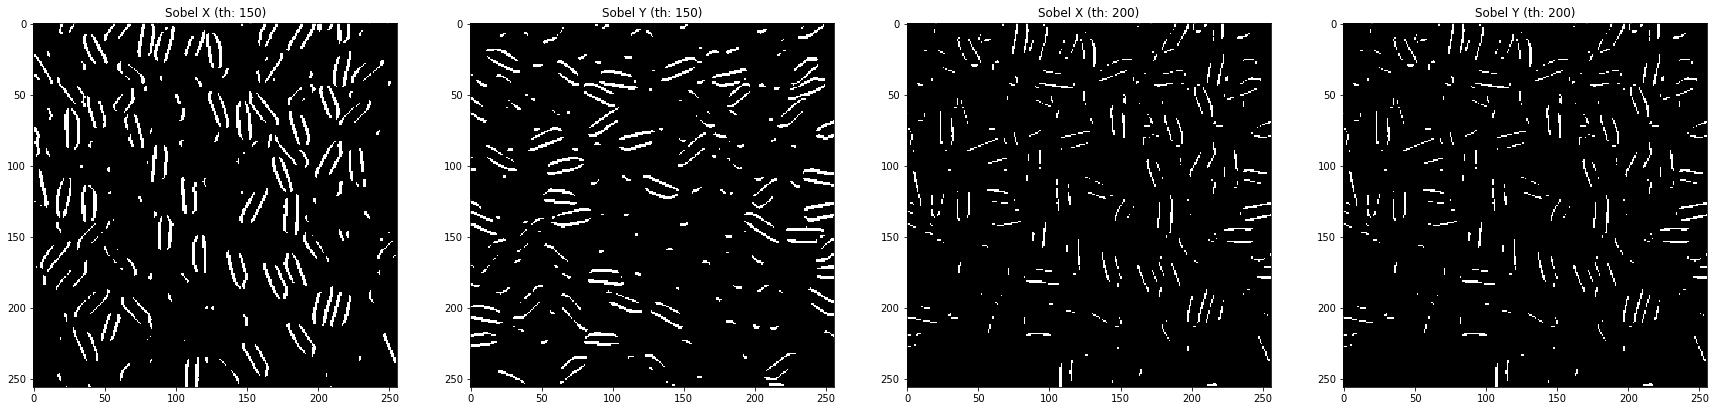

In [74]:
img_rice = cv2.imread(data_path + file_rice)

# Using cv2.CV_64F datatype 
sobelx = np.uint8(np.absolute(cv2.Sobel(img_rice, cv2.CV_64F, 1, 0, ksize=3)))
sobely = np.uint8(np.absolute(cv2.Sobel(img_rice, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold
ret,thresh150_x = cv2.threshold(sobelx, 150, 255, cv2.THRESH_BINARY)
ret,thresh150_y = cv2.threshold(sobely, 150, 255, cv2.THRESH_BINARY)
ret,thresh200_x = cv2.threshold(sobelx, 200, 255, cv2.THRESH_BINARY)
ret,thresh200_y = cv2.threshold(sobely, 200, 255, cv2.THRESH_BINARY)
thresh200 = thresh200_x + thresh200_y
print_images([(thresh150_x, 'Sobel X (th: 150)'),
              (thresh150_y, 'Sobel Y (th: 150)'),
              (thresh200, 'Sobel X (th: 200)'),
              (thresh200, 'Sobel Y (th: 200)')], 30)

In [68]:
# Getting blurred images
img_rice_filter_box = cv2.blur(img_rice, (5,5))
img_rice_filter_gaussian = cv2.GaussianBlur(img_rice, ksize = (5,5), sigmaX = 2)

# Getting sharp images
img_rice_sharp_box = sharpen_img(img_rice, img_rice_filter_box)
img_rice_sharp_gaussian = sharpen_img(img_rice, img_rice_filter_gaussian)

# Apply Sobel filter
sobelx_box = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_box, cv2.CV_64F, 1, 0, ksize=3)))
sobely_box = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_box, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold
ret,thresh150_x = cv2.threshold(sobelx, 150, 255, cv2.THRESH_BINARY)
ret,thresh150_y = cv2.threshold(sobely, 150, 255, cv2.THRESH_BINARY)
ret,thresh200_x = cv2.threshold(sobelx, 200, 255, cv2.THRESH_BINARY)
ret,thresh200_y = cv2.threshold(sobely, 200, 255, cv2.THRESH_BINARY)


### Part 2

## Q.2.2 Laplacian of Gaussian